In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler

import pickle
from os import path

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor


In [7]:
data = pd.read_csv('/content/train.csv')
stores = pd.read_csv('/content/stores.csv')
features = pd.read_csv('/content/features.csv')

In [8]:
data.shape

(139088, 5)

In [9]:
data.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday
139083,15,7,2012-02-10,16247.95,True
139084,15,7,2012-02-17,15406.85,False
139085,15,7,2012-02-24,15227.62,False
139086,15,7,2012-03-02,12812.38,False
139087,15,7,2012-03-09,13676.37,False


In [10]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139088 entries, 0 to 139087
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         139088 non-null  int64  
 1   Dept          139088 non-null  int64  
 2   Date          139088 non-null  object 
 3   Weekly_Sales  139088 non-null  float64
 4   IsHoliday     139088 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 4.4+ MB


In [12]:
stores.shape

(45, 3)

In [13]:
stores.tail()

,Store,Type,Size
40,41,A,196321
41,42,C,39690
42,43,C,41062
43,44,C,39910
44,45,B,118221


In [14]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [15]:
features.shape

(8190, 12)

In [16]:
features.tail()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False
8189,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False


In [17]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [18]:
features["CPI"].fillna(features["CPI"].median(),inplace=True)
features["Unemployment"].fillna(features["Unemployment"].median(),inplace=True)

In [19]:
for i in range(1,6):
  features["MarkDown"+str(i)] = features["MarkDown"+str(i)].apply(lambda x: 0 if x < 0 else x)
  features["MarkDown"+str(i)].fillna(value=0,inplace=True)

In [20]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     8190 non-null   float64
 5   MarkDown2     8190 non-null   float64
 6   MarkDown3     8190 non-null   float64
 7   MarkDown4     8190 non-null   float64
 8   MarkDown5     8190 non-null   float64
 9   CPI           8190 non-null   float64
 10  Unemployment  8190 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [21]:
data = pd.merge(data,stores,on='Store',how='left')

In [22]:
data = pd.merge(data,features,on=['Store','Date'],how='left')

In [23]:
data['Date'] = pd.to_datetime(data['Date'])

In [24]:
data.sort_values(by=['Date'],inplace=True)

In [25]:
data.set_index(data.Date, inplace=True)

In [26]:
data['IsHoliday_x'].isin(data['IsHoliday_y']).all()

True

In [27]:
data.drop(columns='IsHoliday_x',inplace=True)
data.rename(columns={"IsHoliday_y" : "IsHoliday"}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 139088 entries, 2010-02-05 to 2012-10-26
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         139088 non-null  int64         
 1   Dept          139088 non-null  int64         
 2   Date          139088 non-null  datetime64[ns]
 3   Weekly_Sales  139088 non-null  float64       
 4   Type          139088 non-null  object        
 5   Size          139088 non-null  int64         
 6   Temperature   139088 non-null  float64       
 7   Fuel_Price    139088 non-null  float64       
 8   MarkDown1     139088 non-null  float64       
 9   MarkDown2     139088 non-null  float64       
 10  MarkDown3     139088 non-null  float64       
 11  MarkDown4     139088 non-null  float64       
 12  MarkDown5     139088 non-null  float64       
 13  CPI           139088 non-null  float64       
 14  Unemployment  139088 non-null  float64       
 15  I

In [28]:
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Date,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
2010-02-05,3,17,2010-02-05,3163.43,B,37392,45.71,2.572,0.0,0.0,0.0,0.0,0.0,214.424881,7.368,False
2010-02-05,12,41,2010-02-05,580.00,B,112238,49.47,2.962,0.0,0.0,0.0,0.0,0.0,126.442065,13.975,False
2010-02-05,3,16,2010-02-05,3701.57,B,37392,45.71,2.572,0.0,0.0,0.0,0.0,0.0,214.424881,7.368,False
2010-02-05,12,42,2010-02-05,5795.28,B,112238,49.47,2.962,0.0,0.0,0.0,0.0,0.0,126.442065,13.975,False


In [29]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Week'] = data['Date'].dt.week

<ipython-input-29-5a11e9e33be7>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data['Week'] = data['Date'].dt.week


In [30]:
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Year,Month,Week
Date,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2010,2,5
2010-02-05,3,17,2010-02-05,3163.43,B,37392,45.71,2.572,0.0,0.0,0.0,0.0,0.0,214.424881,7.368,False,2010,2,5
2010-02-05,12,41,2010-02-05,580.00,B,112238,49.47,2.962,0.0,0.0,0.0,0.0,0.0,126.442065,13.975,False,2010,2,5
2010-02-05,3,16,2010-02-05,3701.57,B,37392,45.71,2.572,0.0,0.0,0.0,0.0,0.0,214.424881,7.368,False,2010,2,5
2010-02-05,12,42,2010-02-05,5795.28,B,112238,49.47,2.962,0.0,0.0,0.0,0.0,0.0,126.442065,13.975,False,2010,2,5


In [31]:
agg_data = data.groupby(['Store', 'Dept']).Weekly_Sales.agg(['max', 'min', 'mean', 'median', 'std']).reset_index()
agg_data.isnull().sum()

Store      0
Dept       0
max        0
min        0
mean       0
median     0
std       11
dtype: int64

In [32]:
store_data = pd.merge(left=data,right=agg_data,on=['Store', 'Dept'],how ='left')
store_data.dropna(inplace=True)
data = store_data.copy()
del store_data

In [33]:
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by=['Date'],inplace=True)
data.set_index(data.Date, inplace=True)
data.head()


,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,...,8.106,False,2010,2,5,57592.12,14537.37,22513.322937,18535.48,9854.349032
2010-02-05,7,56,2010-02-05,640.00,B,70713,10.53,2.580,0.0,0.0,...,9.014,False,2010,2,5,53126.23,81.00,6417.879021,2038.26,11336.458805
2010-02-05,7,58,2010-02-05,543.00,B,70713,10.53,2.580,0.0,0.0,...,9.014,False,2010,2,5,5725.00,170.00,972.628500,826.50,732.209246
2010-02-05,7,38,2010-02-05,37611.70,B,70713,10.53,2.580,0.0,0.0,...,9.014,False,2010,2,5,44914.44,23405.55,31451.814685,30998.54,4484.651396
2010-02-05,7,59,2010-02-05,196.88,B,70713,10.53,2.580,0.0,0.0,...,9.014,False,2010,2,5,508.96,-12.47,81.489487,66.55,86.868030


In [34]:
data['Total_MarkDown'] = data['MarkDown1']+data['MarkDown2']+data['MarkDown3']+data['MarkDown4']+data['MarkDown5']
data.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis = 1,inplace=True)

In [35]:
numeric_col = ['Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment','Total_MarkDown']
data_numeric = data[numeric_col].copy()

In [36]:
data.shape

(139077, 20)

In [37]:
data = data[(np.abs(stats.zscore(data_numeric)) < 2.5).all(axis = 1)]
data.shape

(122593, 20)

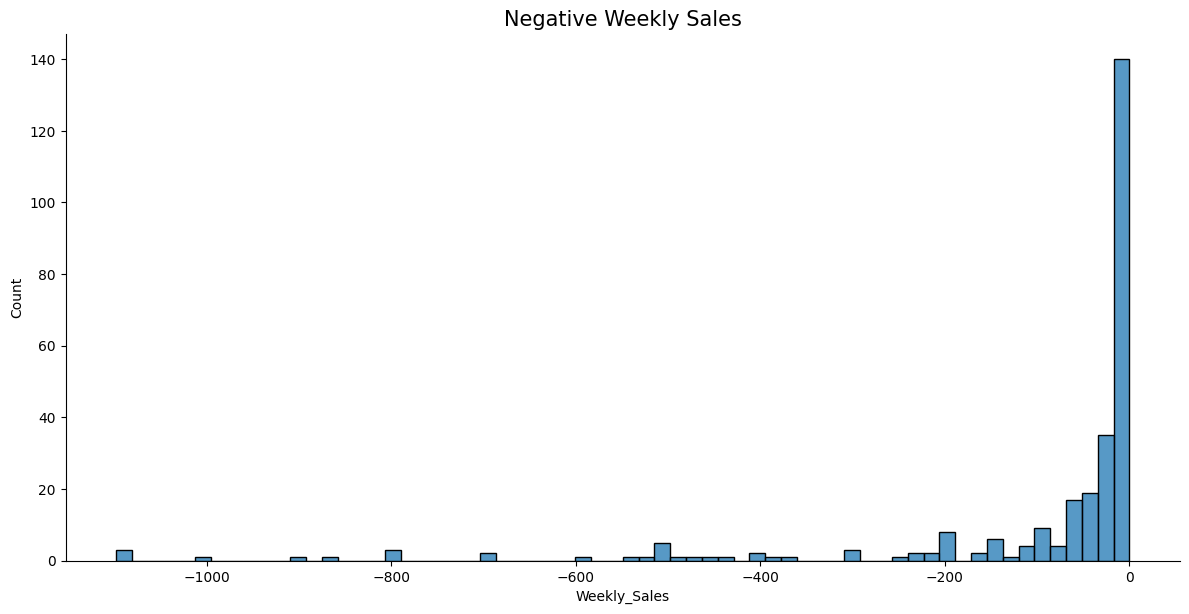

In [39]:
y = data["Weekly_Sales"][data.Weekly_Sales < 0]
sns.displot(y,height=6,aspect=2)
plt.title("Negative Weekly Sales", fontsize=15)
plt.show()


In [40]:
data=data[data['Weekly_Sales']>=0]

In [41]:
data.shape

(122313, 20)

In [42]:
data['IsHoliday'] = data['IsHoliday'].astype('int')

In [43]:
data

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std,Total_MarkDown
Date,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,211.096358,8.106,0,2010,2,5,57592.12,14537.37,22513.322937,18535.48,9854.349032,0.00
2010-02-05,8,2,2010-02-05,37550.10,A,155078,34.14,2.572,214.471451,6.299,0,2010,2,5,49718.81,28738.63,35729.821748,35278.16,2705.740485,0.00
2010-02-05,8,3,2010-02-05,10483.04,A,155078,34.14,2.572,214.471451,6.299,0,2010,2,5,49937.40,4760.65,10683.305105,7736.56,8098.106815,0.00
2010-02-05,6,97,2010-02-05,20947.70,A,202505,40.43,2.572,212.622352,7.259,0,2010,2,5,28324.66,15886.23,20637.667063,20344.92,2113.679263,0.00
2010-02-05,8,22,2010-02-05,8981.78,A,155078,34.14,2.572,214.471451,6.299,0,2010,2,5,17164.73,3907.15,7138.113287,6634.02,2109.344354,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,2,54,2012-10-26,23.92,A,202307,69.79,3.506,223.078337,6.170,0,2012,10,43,526.00,-38.00,104.502868,60.38,114.780504,9678.80
2012-10-26,9,36,2012-10-26,517.74,B,125833,69.52,3.506,227.232807,4.954,0,2012,10,43,5025.50,-4.98,800.506408,581.25,758.714203,2189.61
2012-10-26,13,16,2012-10-26,6036.21,A,219622,46.97,3.755,131.193097,5.621,0,2012,10,43,65226.89,2236.10,22255.482098,15575.19,18580.840304,17985.13


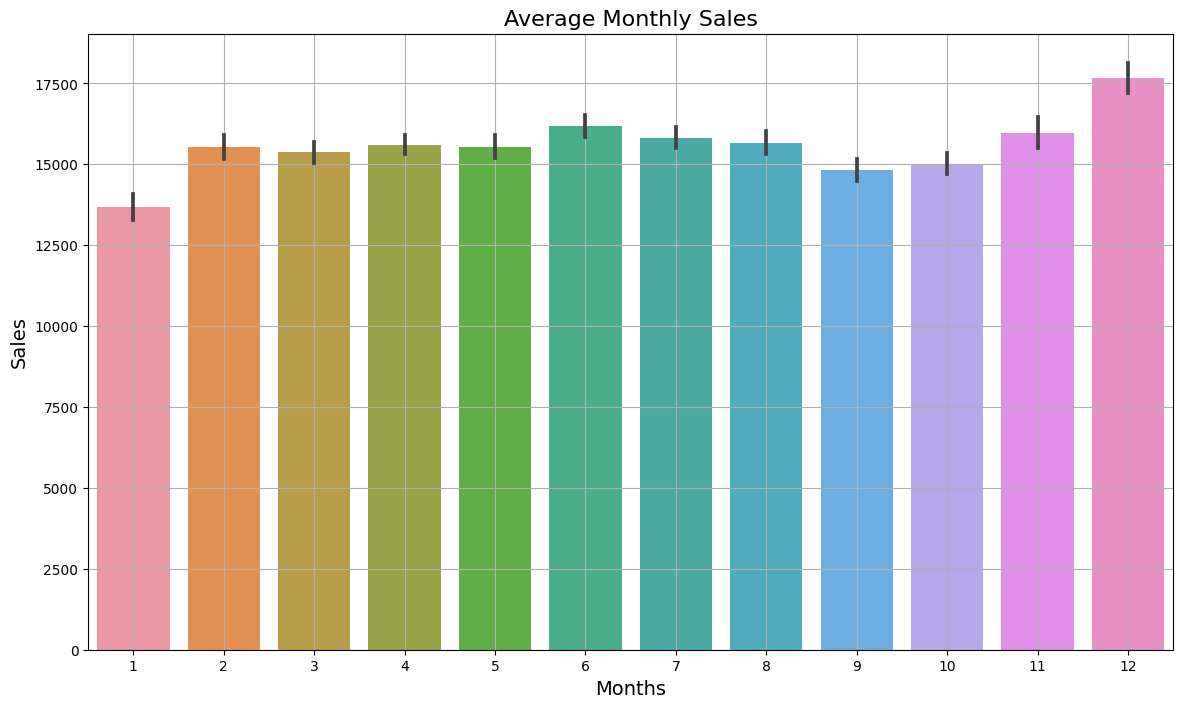

In [46]:
plt.figure(figsize=(14,8))
sns.barplot(x='Month',y='Weekly_Sales',data=data)
plt.ylabel('Sales',fontsize=14)
plt.xlabel('Months',fontsize=14)
plt.title('Average Monthly Sales',fontsize=16)
plt.grid()


In [47]:
data_monthly = pd.crosstab(data["Year"], data["Month"], values=data["Weekly_Sales"],aggfunc='sum')
data_monthly

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2010,NaN,52676099.31,52557656.17,67895134.31,53402381.85,55699669.33,67893937.46,54929377.99,51614774.47,65190971.06,56055287.32,74582265.16
2011,44637477.92,51629120.84,54028783.12,68161243.29,53152952.64,56147644.54,68700903.39,55159001.34,65038157.27,53287909.42,41081415.15,57431250.90
2012,43591902.61,41787846.53,70853335.28,59756122.96,60179828.34,75069499.69,57643628.31,64647888.47,56310539.83,53255385.87,NaN,NaN


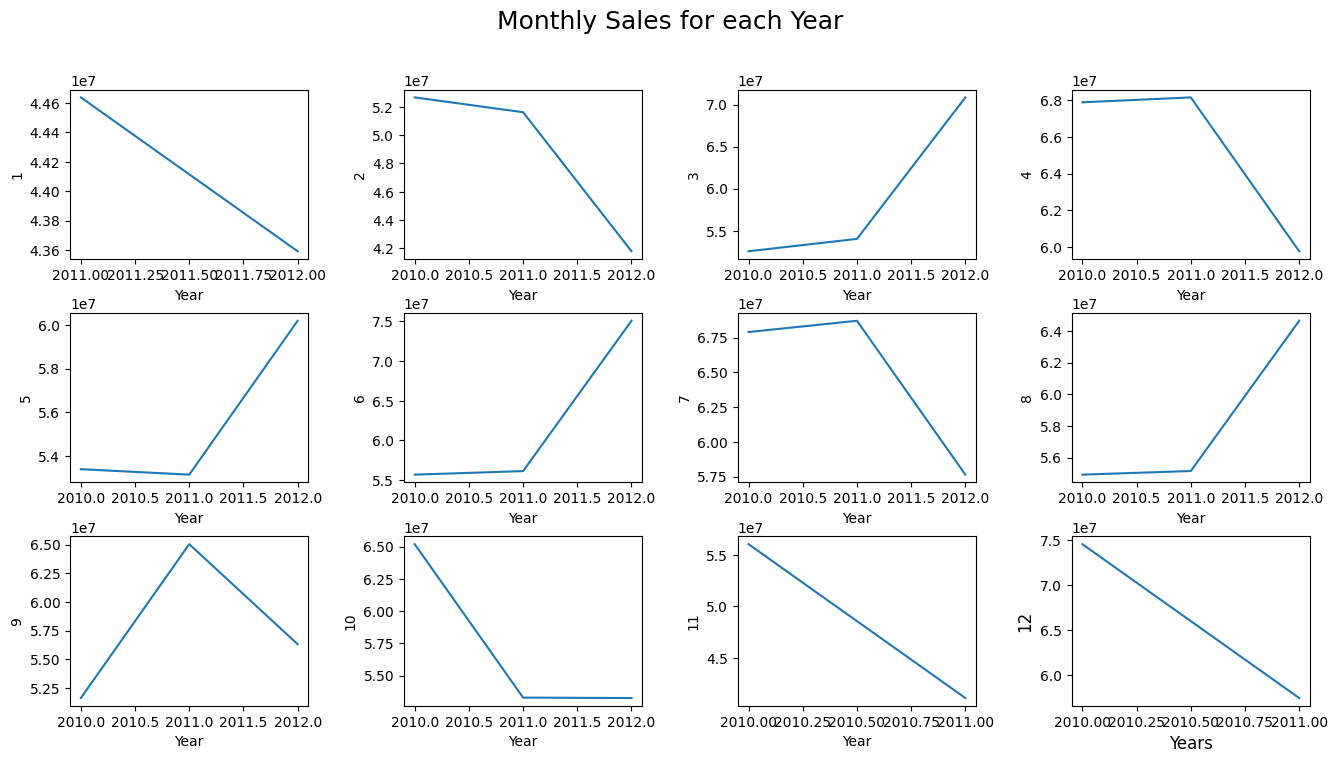

In [49]:
fig, axes = plt.subplots(3,4,figsize=(16,8))
plt.suptitle('Monthly Sales for each Year', fontsize=18)
k=1
for i in range(3):
    for j in range(4):
      sns.lineplot(ax=axes[i,j],data=data_monthly[k])
      plt.subplots_adjust(wspace=0.4,hspace=0.32)
      plt.ylabel(k,fontsize=12)
      plt.xlabel('Years',fontsize=12)
      k+=1

plt.show()

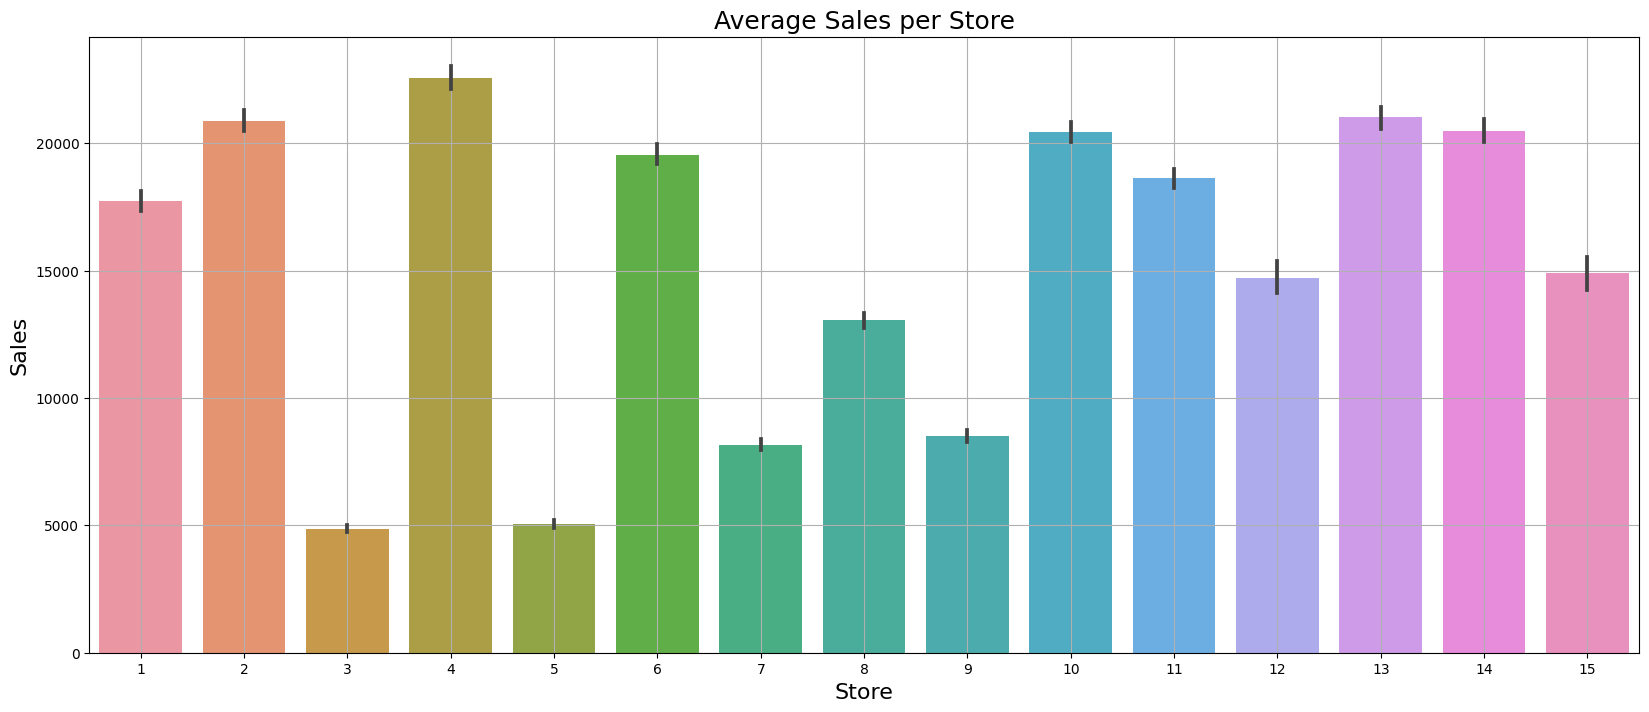

In [51]:
plt.figure(figsize=(20,8))
sns.barplot(x='Store',y='Weekly_Sales',data=data)
plt.grid()
plt.title('Average Sales per Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.show()

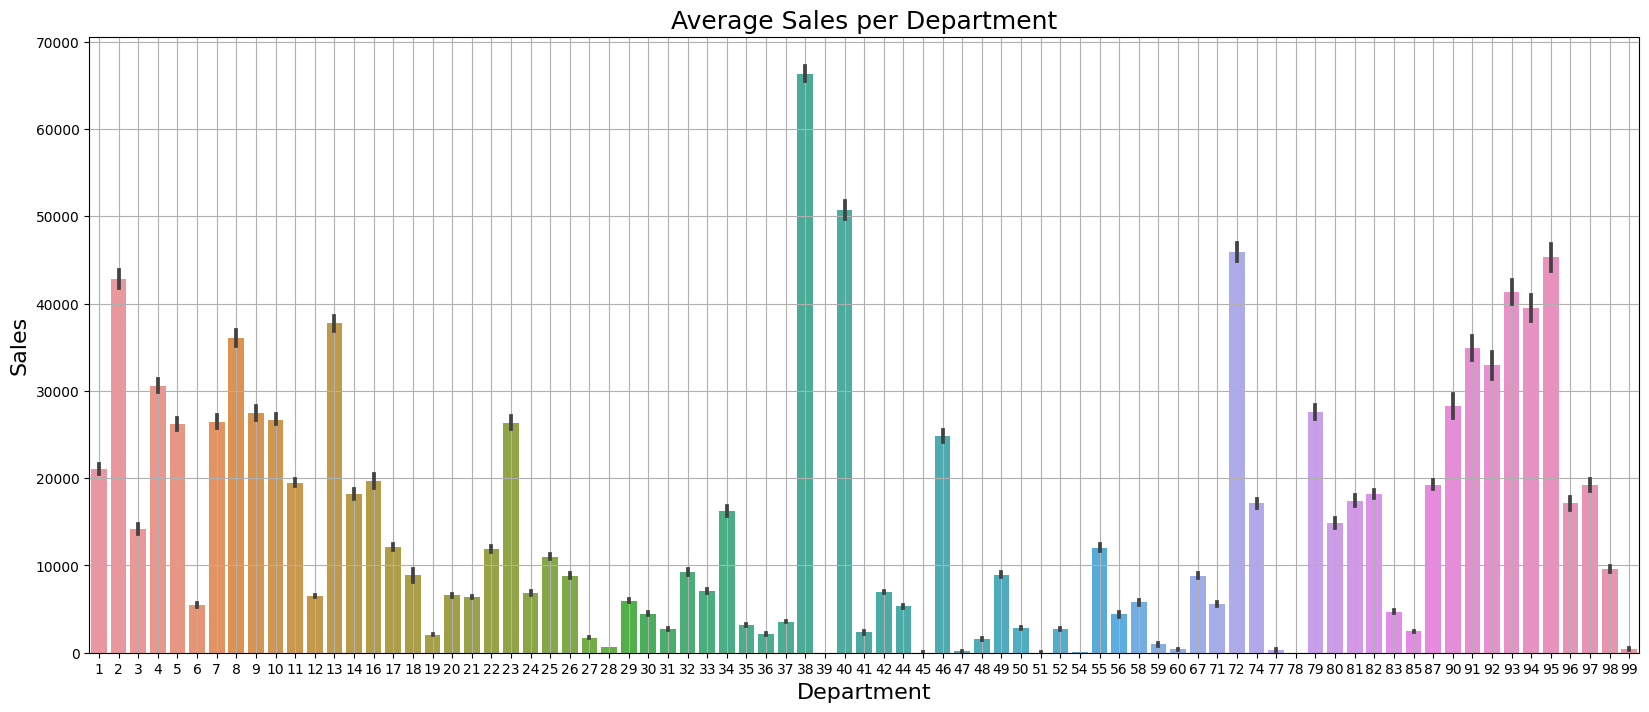

In [53]:
plt.figure(figsize=(20,8))
sns.barplot(x='Dept',y='Weekly_Sales',data=data)
plt.grid()
plt.title('Average Sales per Department', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Department', fontsize=16)
plt.show()

<ipython-input-54-6fa06d0c5fa6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Temperature'])


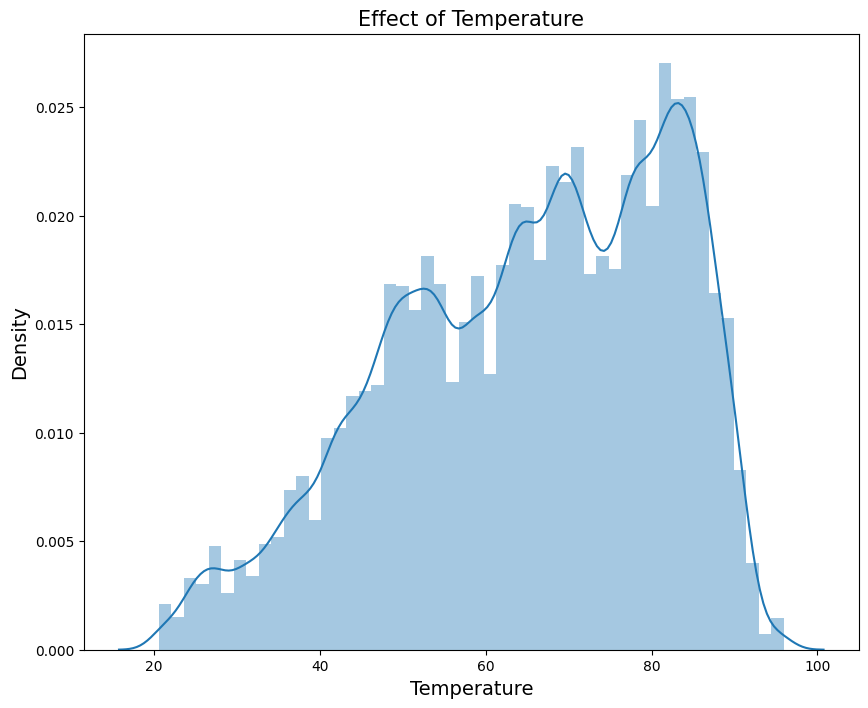

In [54]:
plt.figure(figsize=(10,8))
sns.distplot(data['Temperature'])
plt.title('Effect of Temperature',fontsize=15)
plt.xlabel('Temperature',fontsize=14)
plt.ylabel('Density',fontsize=14)
plt.show()

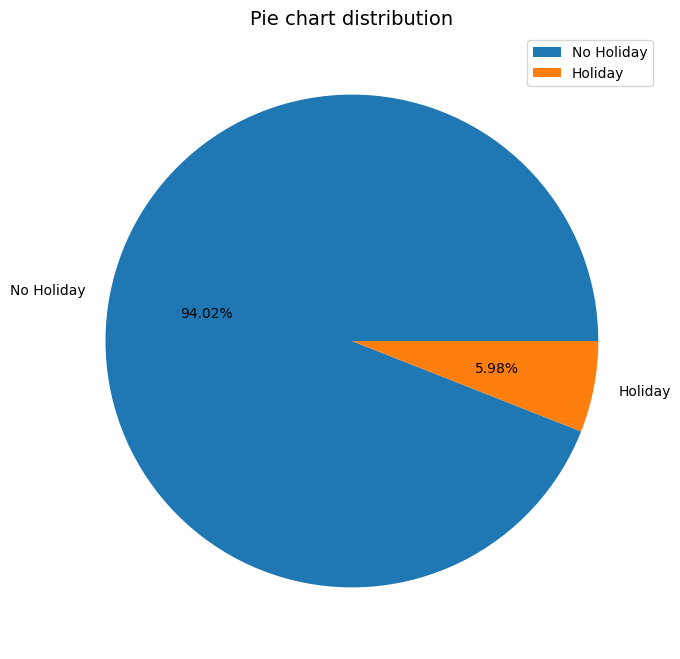

In [55]:
plt.figure(figsize=(8,8))
plt.pie(data['IsHoliday'].value_counts(),labels=['No Holiday','Holiday'],autopct='%0.2f%%')
plt.title("Pie chart distribution",fontsize=14)
plt.legend()
plt.show()

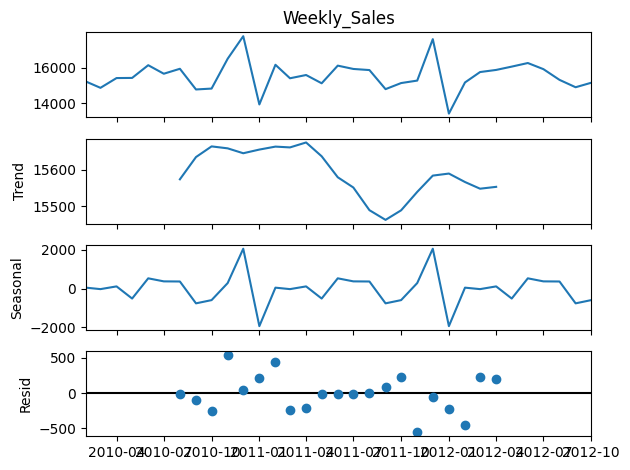

In [59]:
sm.tsa.seasonal_decompose(data['Weekly_Sales'].resample('MS').mean(), model='additive').plot()
plt.show()

##One_Hot_Encoding

In [60]:
cat_col = ['Store','Dept','Type']
data_cat = data[cat_col].copy()

In [61]:
data_cat.tail()

,Store,Dept,Type
Date,,,
2012-10-26,2,54,A
2012-10-26,9,36,B
2012-10-26,13,16,A
2012-10-26,2,22,A
2012-10-26,14,13,A


In [62]:
data_cat = pd.get_dummies(data_cat,columns=cat_col)

In [63]:
data_cat.head()

,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,...,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2010-02-05,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [64]:
data.shape

(122313, 20)

In [65]:
data = pd.concat([data, data_cat],axis=1)

In [66]:
data.shape

(122313, 116)

In [67]:
data.drop(columns=cat_col,inplace=True)

In [68]:
data.drop(columns=['Date'],inplace=True)

In [69]:
data.shape

(122313, 112)

In [70]:
num_col = ['Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment','Total_MarkDown','max','min','mean','median','std']


In [71]:
minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return df

In [72]:
data.head()

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,...,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,24924.50,151315,42.31,2.572,211.096358,8.106,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,37550.10,155078,34.14,2.572,214.471451,6.299,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,10483.04,155078,34.14,2.572,214.471451,6.299,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,20947.70,202505,40.43,2.572,212.622352,7.259,0,2010,2,5,...,0,0,0,0,0,1,0,0,1,0
2010-02-05,8981.78,155078,34.14,2.572,214.471451,6.299,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0


In [73]:
data = normalization(data.copy(),num_col)

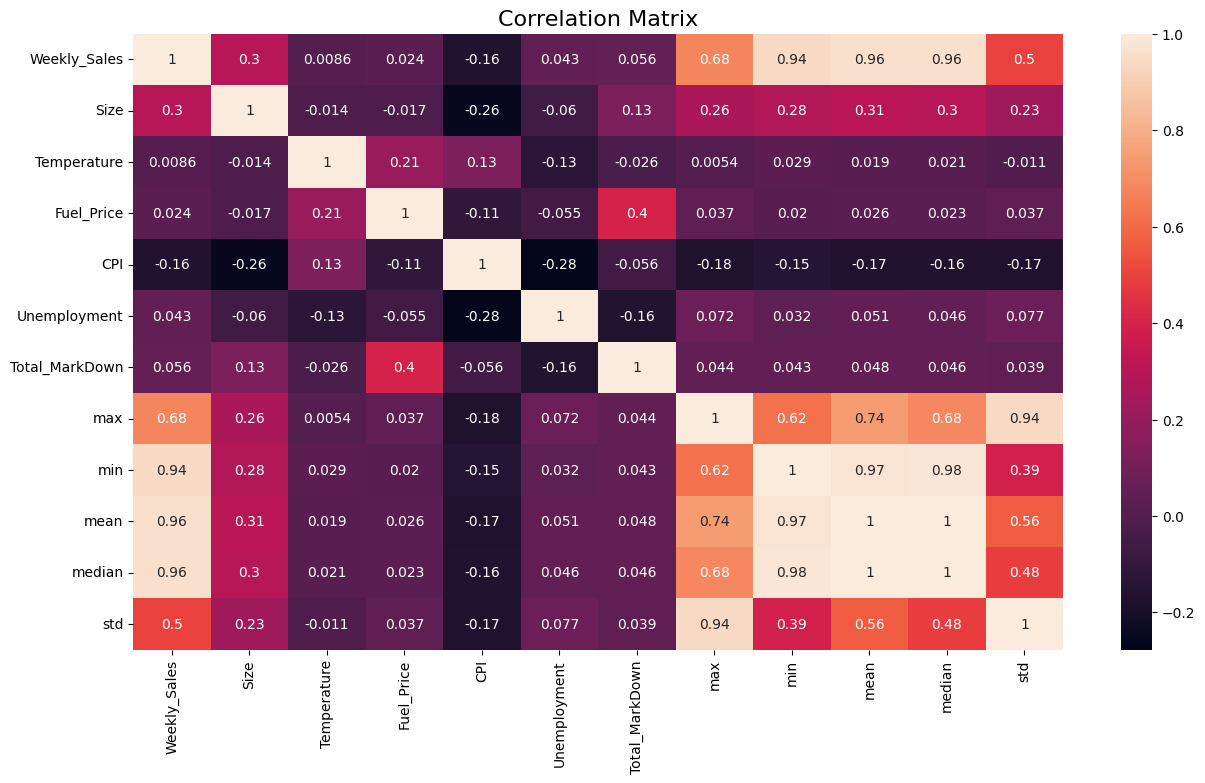

In [74]:
plt.figure(figsize=(15,8))
corr = data[num_col].corr()
sns.heatmap(corr,vmax=1.0,annot=True)
plt.title('Correlation Matrix',fontsize=16)
plt.show()

##Data Splitted into Training, Validation, Test

In [81]:
X = data.drop(['Weekly_Sales'],axis=1)
Y = data.Weekly_Sales

In [98]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state=50)

##Random Forest Regressor Model

In [104]:

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [105]:
rf_acc = rf.score(X_test,y_test)*100
print("Random Forest Regressor Accuracy - ",rf_acc)

Random Forest Regressor Accuracy -  97.94041436199348


In [106]:
y_pred = rf.predict(X_test)

In [107]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.015839094090976513
MSE 0.0009915316116009536
RMSE 0.031488594944851914
R2 0.9794050231023345


In [109]:
rf_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
rf_df

,Actual,Predicted
Date,,
2011-11-18,0.000386,0.002653
2010-11-12,0.183742,0.229677
2010-09-24,0.031150,0.039964
2012-07-06,0.025604,0.029041
2012-08-03,0.001311,0.002058
...,...,...
2010-03-12,0.012606,0.013646
2011-03-04,0.041666,0.038957
2010-08-20,0.301192,0.325234


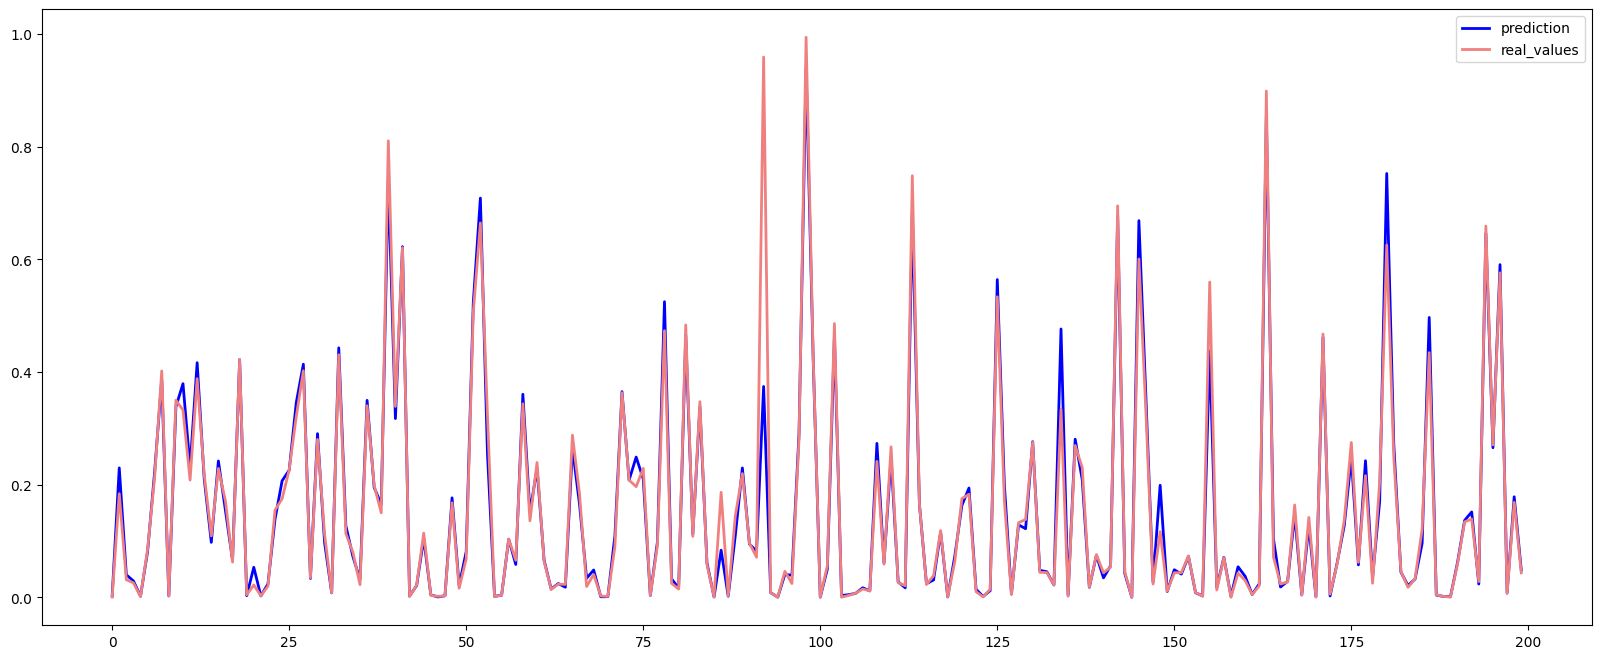

In [110]:
plt.figure(figsize=(20,8))
plt.plot(rf.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()

In [111]:
pkl_filename = "./randomforest_regressor.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(rf, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Saved model to disk


##K Neighbors Regressor Model

In [112]:
knn = KNeighborsRegressor(n_neighbors = 1,weights = 'uniform')
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=1)

In [113]:
knn_acc = knn.score(X_test, y_test)*100
print("KNeigbhbors Regressor Accuracy - ",knn_acc)

KNeigbhbors Regressor Accuracy -  96.24626794474696


In [114]:
y_pred = knn.predict(X_test)

In [115]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.020762959202137554
MSE 0.00180713242779537
RMSE 0.042510380235836163
R2 0.9624646444232685


In [116]:
knn_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
knn_df

,Actual,Predicted
Date,,
2011-11-18,0.000386,0.011499
2010-11-12,0.183742,0.226856
2010-09-24,0.031150,0.042191
2012-07-06,0.025604,0.062513
2012-08-03,0.001311,0.001066
...,...,...
2010-03-12,0.012606,0.011818
2011-03-04,0.041666,0.039204
2010-08-20,0.301192,0.301517


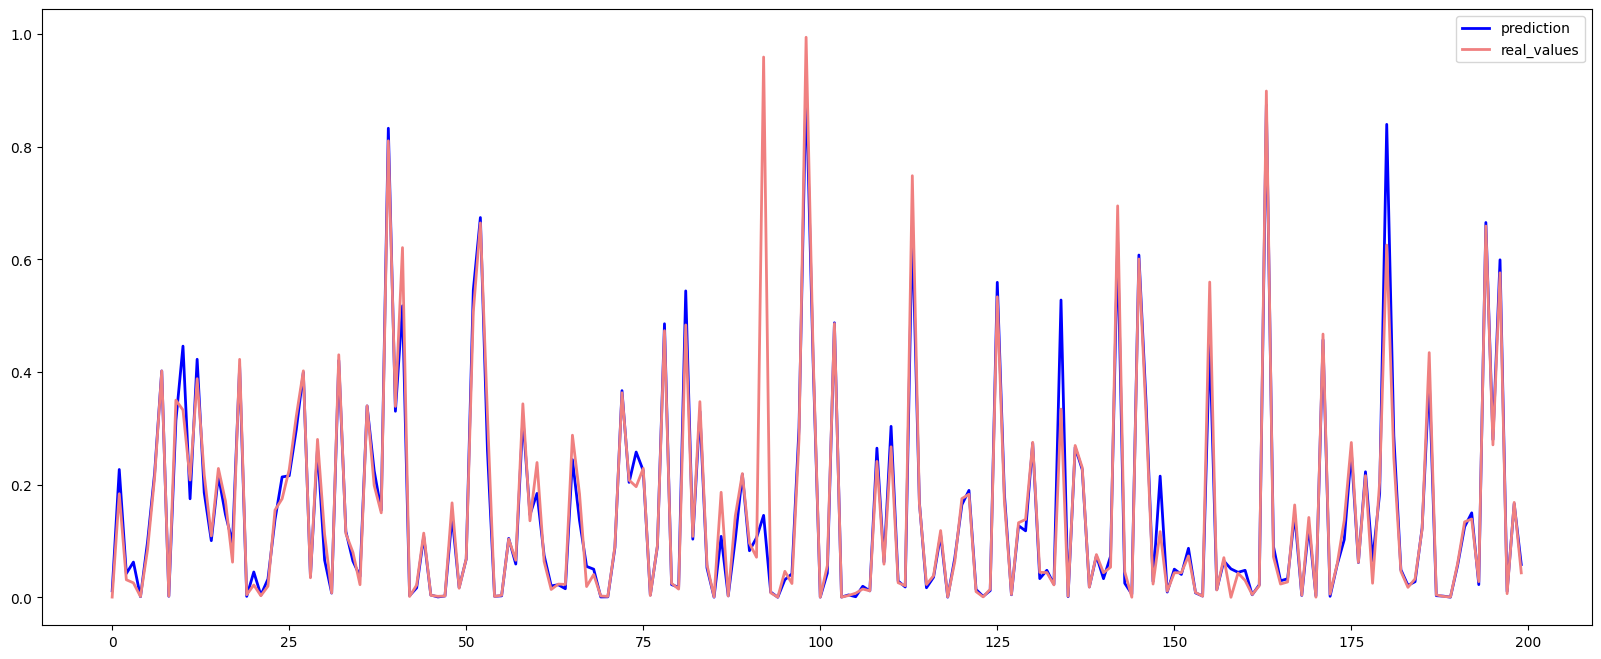

In [118]:
plt.figure(figsize=(20,8))
plt.plot(knn.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()

In [119]:
pkl_filename = "./knn_regressor.pkl"
if (not path.isfile(pkl_filename)):
  with open(pkl_filename, 'wb') as file:
    pickle.dump(knn, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Saved model to disk


##XGboost Model

In [120]:
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [121]:
xgb_acc = xgbr.score(X_test,y_test)*100
print("XGBoost Regressor Accuracy - ",xgb_acc)

XGBoost Regressor Accuracy -  98.00967454166579


In [122]:
y_pred = xgbr.predict(X_test)

In [123]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.01744026809383995
MSE 0.0009581881777067826
RMSE 0.030954614804690795
R2 0.9800967786779701


In [125]:
xgb_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
xgb_df

,Actual,Predicted
Date,,
2011-11-18,0.000386,0.008521
2010-11-12,0.183742,0.229236
2010-09-24,0.031150,0.042599
2012-07-06,0.025604,0.036973
2012-08-03,0.001311,0.001303
...,...,...
2010-03-12,0.012606,0.008893
2011-03-04,0.041666,0.036838
2010-08-20,0.301192,0.341814


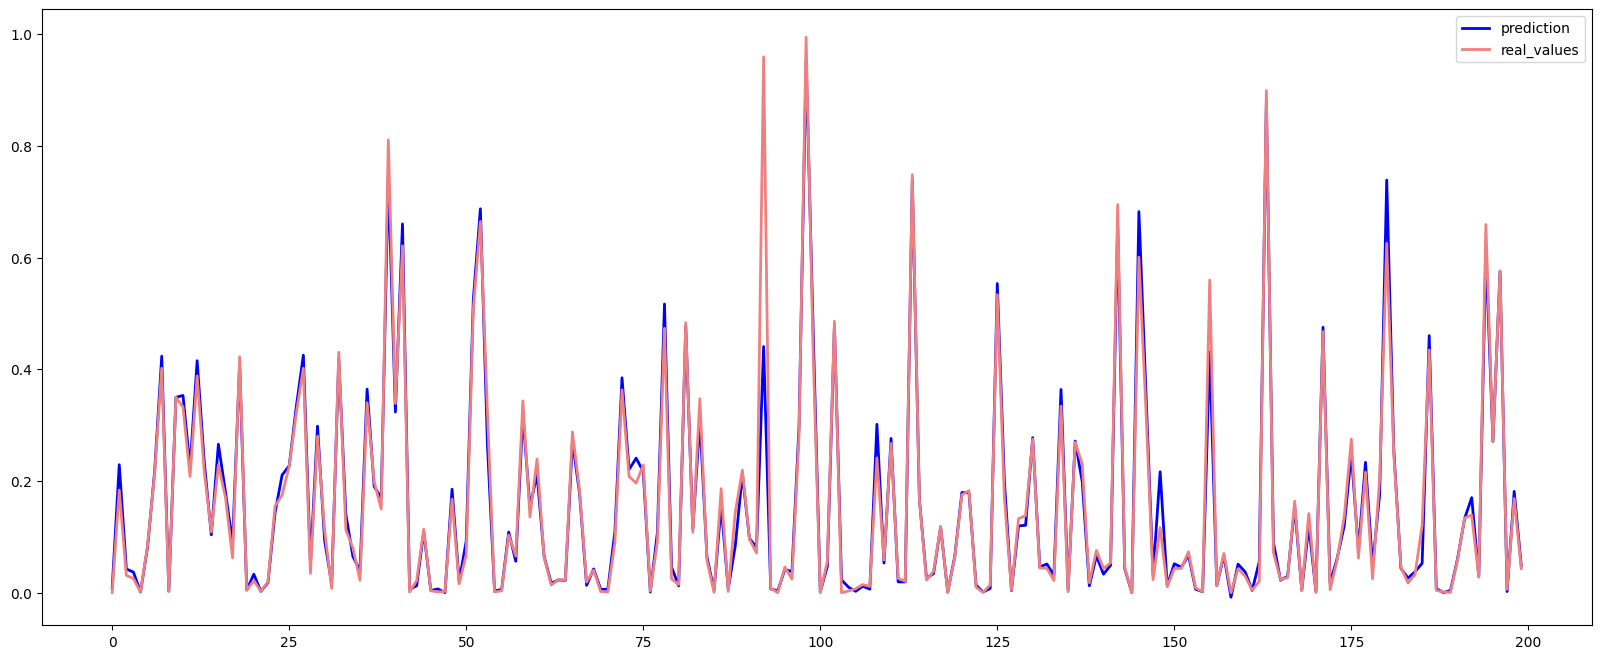

In [126]:
plt.figure(figsize=(20,8))
plt.plot(xgbr.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()


In [127]:
pkl_filename = "./xgboost_regressor.pkl"
if (not path.isfile(pkl_filename)):
  with open(pkl_filename, 'wb') as file:
    pickle.dump(xgbr, file)
  print("Saved model to disk")
else:
  print("Model already saved")


Saved model to disk


##Comparing Models

In [130]:
acc = {'model':['randomforest','knearest_neighbours','xgboost'],'accuracy':[rf_acc,knn_acc,xgb_acc]}

In [131]:
acc_df = pd.DataFrame(acc)
acc_df

,model,accuracy
0,rf_acc,97.940414
1,knn_acc,96.246268
2,xgb_acc,98.009675


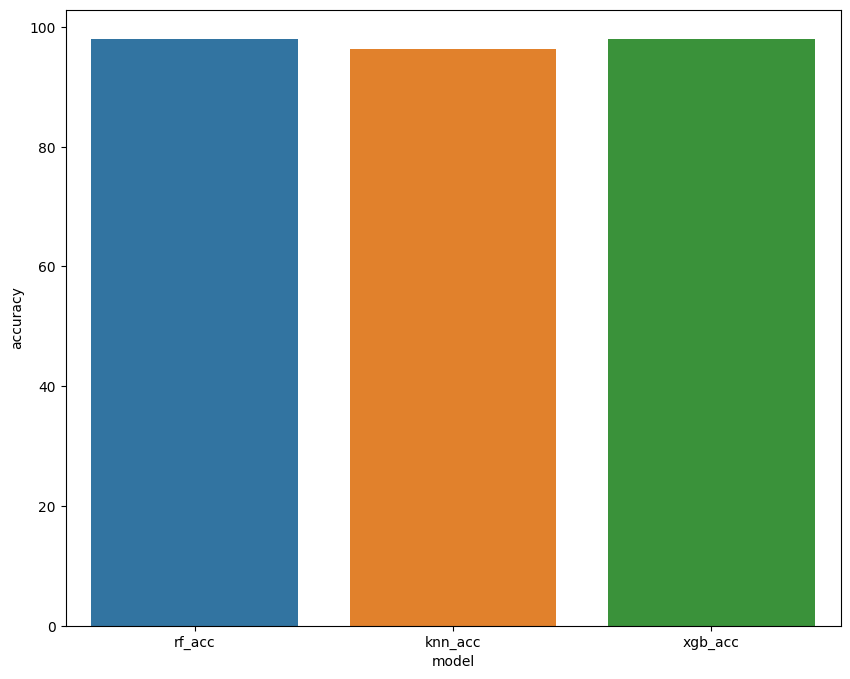

In [132]:
plt.figure(figsize=(10,8))
sns.barplot(x='model',y='accuracy',data=acc_df)
plt.show()